<h2>Machine Learning Assignment for Yeast Classification</h2>

In [7]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [8]:
#importing the dataset
df = pd.read_csv("yeast.csv")

In [9]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


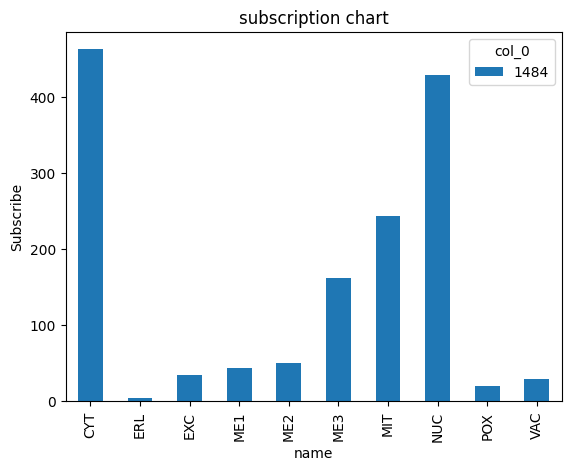

In [10]:
%matplotlib inline
pd.crosstab(df['name'],df['mit'].count()).plot(kind='bar')

plt.title('subscription chart')
plt.xlabel('name')
plt.ylabel('Subscribe')
plt.savefig('Type')

<Axes: xlabel='vac', ylabel='name'>

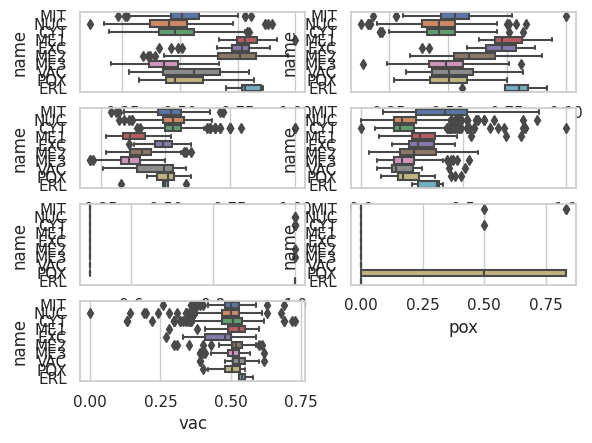

In [12]:

sns.set(style='whitegrid')


plt.subplot(4,2,1)
sns.boxplot(x ='mcg', y = 'name', data=df)
plt.subplot(4,2,2)
sns.boxplot(x ='gvh', y = 'name', data=df)
plt.subplot(4,2,3)
sns.boxplot(x ='alm', y = 'name', data=df)
plt.subplot(4,2,4)
sns.boxplot(x ='mit', y = 'name', data=df)
plt.subplot(4,2,5)
sns.boxplot(x ='erl', y = 'name', data=df)
plt.subplot(4,2,6)
sns.boxplot(x ='pox', y = 'name', data=df)
plt.subplot(4,2,7)
sns.boxplot(x ='vac', y = 'name', data=df)

In [13]:
df.groupby('name').count()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
name,,,,,,,,
CYT,463,463,463,463,463,463,463,463
ERL,5,5,5,5,5,5,5,5
EXC,35,35,35,35,35,35,35,35
ME1,44,44,44,44,44,44,44,44
ME2,51,51,51,51,51,51,51,51
ME3,163,163,163,163,163,163,163,163
MIT,244,244,244,244,244,244,244,244
NUC,429,429,429,429,429,429,429,429
POX,20,20,20,20,20,20,20,20


<Axes: >

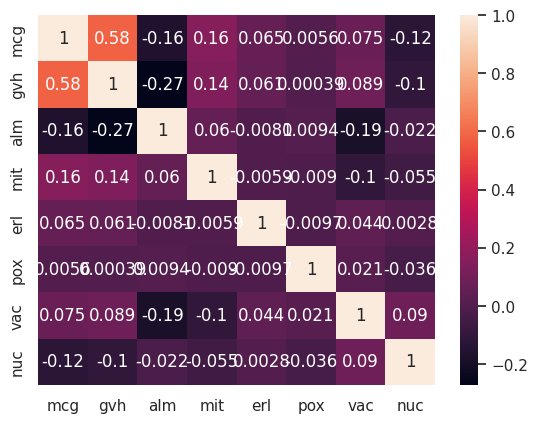

In [14]:
# Compute the correlation matrix
num_df = df.select_dtypes(include='number')
correlation_matrix = num_df.corr()
sns.heatmap(correlation_matrix, annot=True)


In [15]:
df.tail()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


df.columns

In [16]:
df.shape

(1484, 9)

In [17]:
#checking for null values in any column
df.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [18]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [19]:
df['name'].unique()

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [20]:
df['name'].value_counts()

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

In [21]:
#commented as it is taking too much time
#sns.pairplot(df,hue = "name")
#for plotting the outliers for the column
#sns.boxplot(df['nuc'])

In [22]:
# Convert the "name" column into numerical labels using LabelEncoder
le = LabelEncoder()

In [23]:
df['name'] = le.fit_transform(df['name'])
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [24]:
df['name'].value_counts()

name
0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: count, dtype: int64

In [25]:
X = df.drop(columns = ['name'])
y = df['name']
X[:8]

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34


In [26]:
y[8:]

8       6
9       0
10      7
11      7
12      0
       ..
1479    4
1480    7
1481    4
1482    7
1483    0
Name: name, Length: 1476, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=200)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1187, 8) (297, 8)
(1187,) (297,)


In [28]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.5050505050505051

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=200)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1335, 8) (149, 8)
(1335,) (149,)


In [30]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.5100671140939598

In [31]:
#With SVC Model accuracy Score
#from sklearn.svm import SVC
#model = SVC()
#model.fit(X_train, y_train)
#predict = model.predict(X_test)
#accuracy_score(y_test, predict)

In [32]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier()
#model.fit(X_train, y_train)
#predict = model.predict(X_test)
#accuracy_score(y_test, predict)

In [33]:
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
#model.fit(X_train, y_train)
#predict = model.predict(X_test)
#accuracy_score(y_test, predict)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [35]:
#case1
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
#case2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='ovr'))
strtfdKFold = StratifiedKFold(n_splits=3)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    print('\nCross-Validation accuracy: %.3f +/- %.3f \n' %(np.mean(scores), np.std(scores)))    

Fold:  1, Training/Test Split Distribution: [283   4  18  28  31  96 146 251  13  20], Accuracy: 0.564

Cross-Validation accuracy: 0.564 +/- 0.000 

Fold:  2, Training/Test Split Distribution: [282   3  19  28  31  97 145 252  13  20], Accuracy: 0.571

Cross-Validation accuracy: 0.567 +/- 0.003 

Fold:  3, Training/Test Split Distribution: [283   3  19  28  30  97 145 251  14  20], Accuracy: 0.613

Cross-Validation accuracy: 0.583 +/- 0.022 



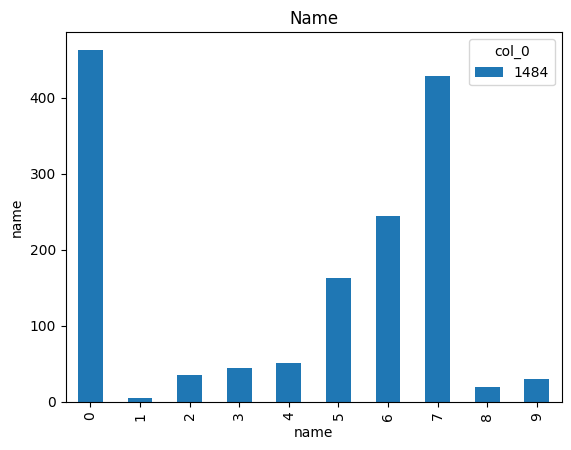

In [69]:
%matplotlib inline
pd.crosstab(df['name'],df['mit'].count()).plot(kind='bar')

plt.title('Name')
plt.xlabel('name')
plt.ylabel('name')
plt.savefig('purchase_fre_job')

In [53]:
df.groupby('name').count()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
name,,,,,,,,
0,463,463,463,463,463,463,463,463
1,5,5,5,5,5,5,5,5
2,35,35,35,35,35,35,35,35
3,44,44,44,44,44,44,44,44
4,51,51,51,51,51,51,51,51
5,163,163,163,163,163,163,163,163
6,244,244,244,244,244,244,244,244
7,429,429,429,429,429,429,429,429
8,20,20,20,20,20,20,20,20
